# CS363M Final Project


## Contributors: 
Kunal Mody, Omeed Tehrani, Alex Chandler, Felipe Paz

## Official Title: 
Genre Detection and Model Evaluation with FMA using Traditional Machine Learning / Modern Approaches for Audio Classification

## General Overview: 
This project compares traditional machine learning techniques to more modern approaches for audio genre classification. 

## Getting Started:
This project has been transfered to a a Jupyter Notebook, but traditionally, the following steps would be used to create a virtual environment and install the necessary modules

'''virtualenv music_genre_env source music_genre_env/bin/activate pip3 install -r requirements.txt'''

This jupyter notebook requires the mounting of a google drive. Code for that is in the notebook.

### Enabling GPU
Runtime -> Change runtime type -> Hardware accelerator -> GPU

## Introduction:

1. What is the machine learning problem we are trying to solve? <br>
Our project goal is to classify MP3 audio data of 30 second snippets of songs into 8 genres.
Audio classification is a challenging problem in machine learning, especially with traditional machine learning methods such as regression, and decision trees. Any success without utilizing recent improvements in the field requires finding meaningful signals or features from audio pre-processing methods.

2. Why does this problem matter? <br>
Audio services such as Spotify, Apple Music, or Shazam, would desire being able to classify music into genres without having access to a database that labels each incoming uploaded audio clip to a certain genre. Additionally, anomaly detection could be performed on existing data that maps audio files to genre. As discussed later in the notebook, existing audio genre data is not fully reliable and full of classified labels that your average listener would disagree with. Attempting this problem also serves a way to learn and sharpen one's skills in processing audio data. Throwing the resampled data into a traditional machine learning method will barely outperform a random guess factoring in the genre probabilities without significant data pre-processing. In effect, this project forces us to learn of methods to extract useful information that could then be fed into a method that does not utilize convolution.

3. What could the results of our predictive model be used for?<br>
Our predictive model, or any current existing, publicically available, model, is not accurate enough to reliably place audio/label data into genres. However, there will be many useful applications once a model is capable of achieving high precision and recall. As discussed in the previous answer, audio services could use the classifier to quality check the labled data by performing anomoly detection. A company could classify newly submitted user-generated audio data into genres, potentially filtering out undesired audio data. 

4. Why would we want to be able to predict genres using this data?<br>

There are a range of applications for this project. 
1. Let's say an artist tries to change the label of their songs to try and gain more streams or attention on a platform like Spotify. By being able to predict the genre of a song using the mp3 data, we can avoid that by creating a robust filtration system. 
2. Instead of using purely search feedback to give a user recommendations on songs, we can use the actual sound of the song to predict future genres and songs similar to a particular genre that the user would enjoy.
3. This methodology attempts to corroborate the idea that good data processing can lead to higher accuracy and scoring, despite the model not being designed for this complex data type. We also want to show, that newer machine learning architectures can be simpler and result in better accuracy on complex data types.

## Description of Dataset

We use the FMA dataset. This dataset is known as the “Free Music Archive”. It is a database of 106,574 songs. Features included in the dataset are title, artist, genres, tags and play counts, for all 106,574 tracks. The MP3-encoded audio data is available in four sizes, ranging from a sample of 8,000 tracks to the full untrimmed unbalanced 106,574 tracks (800+ gigabytes).

There are 106,574 records from 16,341 artists and 14,854 albums. It is important to note that we have access to genre-balanced subsets. 

To minimize memory usage, we use FMA-small, a subset of the dataset which contains 8,000 tracks of 30s, 8 balanced genres (GTZAN-like) (7.2 GiB). It is important to note that this dataset has several issues, including mislabled audio genres and poor data organization.

We have over 50 features for each song, although we will only initially be using the mp3 and genre features. Some of the features are frequently missing, such as ‘engineer’ or ‘comments’. 

List of features from original dataset: ['trackid', 'album', 'comments', 'date', 'created', 'date', 'released', 'engineer', 'favorites', 'id', 'information', 'listens', 'producer', 'tags', 'title', 'tracks', 'type', 'active', 'year', 'begin', 'active', 'year', 'end', 'associated', 'labels', 'bio', 'comments', 'date', 'created', 'favorites', 'id', 'latitude', 'location', 'longitude', 'members', 'name', 'related', 'projects', 'tags', 'website', 'wikipedia', 'page', 'split', 'subset', 'bit', 'rate', 'comments', 'composer', 'date', 'created', 'date', 'recorded', 'duration', 'favorites', 'genre', 'top', 'genres', 'genres', 'all', 'information', 'interest', 'language', 'code', 'license', 'listens', 'lyricist', 'number', 'publisher', 'tags', 'title']

The only feature that we use from the original data is the genre and the mp3 audio.
This dataset contains the labels we are trying to predict (the genres of each song), hinting at supervised learning approaches.


The publication for this dataset is available at: https://arxiv.org/abs/1612.01840

This dataset is available at: https://github.com/mdeff/fma.

## Contact Us

Please reach out to omeed@cs.utexas.edu, alex.chandler@utexas.edu, felipeps2020@gmail.com, kunalmody1@gmail.com for any questions you might have.

## Evaluation
We evaluate the genre classification using both traditional error metrics including recall, precision, accuracy. One challenge with evaluating accuracy is that a song can be multiple genres. A song, for example, can be both acoustic and pop.

# Requirements and Preparations

The following packages are required to run the notebook.

In [3]:
!pip install torchvision
!pip install tqdm
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install torchaudio
!pip install librosa
!pip install parse-utils
!pip install ipywidgets
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 21.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully

## Imports

Import all core libraries used across the entire notebook.

In [3]:
import numpy as np
import math
from tqdm import tqdm
import random
import librosa
import pandas as pd
import os
from torch.utils.data import Dataset
import ast
import torchaudio.transforms as T
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn as skl
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
import pickle
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import MDS
import csv
from collections import deque
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.neural_network import MLPClassifier
import torch
import torchaudio
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys
import pandas as pd
from collections import deque

In [ ]:
# The following imports are used locally to run the transformer code and are not run on the google colab notebook
from transformers import AutoFeatureExtractor
from transformers import AutoModelForAudioClassification, TrainingArguments, Trainer
from datasets import load_dataset, load_metric
from torch.utils.data import random_split

Mounting the songs (data) in the google drive directory, since we are constructing this notebook within Google Colaboratory.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Here, we set up base variables for Google Colaboratory, and perform a check to make sure that the CUDA is available.

In [4]:
 # Make random deterministic for reproducibility
seed = 38
np.random.seed(seed)
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Global Variables

These variables allow for the notebook to run different models and processing methods.

In [5]:
batch_size = 8 # "Number of samples per batch"
num_epochs = 5 # "Number of epochs to train"
model_name = "M5" # "Allows several models to be selected. This variable is used only to reduce memory and computational time for modern machine learning models"
audio_folder_path = "/content/drive/MyDrive/MusicGenreClassifier/data/fma_small"# "File path to audio data used"
sampling_freq = 16_000 # or 8_000 "Allows for resampling music waveforms to different sizes"
padding_length = None # "Allows to right pad samples too small in length"
truncation_length = 1_300_000 # "Specifies max length of a sample"
convert_one_channel = False # "Boolean variable to decide if to convert waveform to one channel". Set to false as using librosa which automatically converts to one channel instead of torchaudio.load
load_dataset_path = None #  "Path to load compressed dataset to save time" (not used in colab)
debug = False # "Allows for easy debugging"
datatype = "np" # allows to switch between desired return type of tensor or np array
warnings.filterwarnings('ignore')

# Data Preprocessing


## Preprocessing functions
These are helper pre-processing functions to be utilized while dealing with raw audio data.

1. resample(): changes the frequency used to sample datapoints from the audio. 
2. truncate_sample(): shortens the datapoints from the audio data if it surpasses the maximum length.
3. pad_right(): adds place-filling zeros to make a smaller audio sample fill the same size as larger audio samples.
4. convert_to_one_channel(): audio samples may contain multiple channels, and this functions converts all of them into a single channel.   
5. zcr(): Zero Crossing Rate is the rate at which the audio changes from positive to negative.

In [6]:
def resample(waveform, orig_freq, new_freq):
    sampler = torchaudio.transforms.Resample(orig_freq,new_freq)
    return sampler(waveform)

def truncate_sample(waveform, max_length):
    num_samples = waveform.shape[0]
    if num_samples > max_length:
        waveform=waveform[:max_length]
    return waveform

def pad_right(waveform, min_samples):
    raise NotImplementedError()

def convert_to_one_channel(waveform):
    return torch.mean(waveform, dim=0, keepdim= True)

def zcr(waveform):
    return librosa.zero_crossing_rate(waveform)

## Build Preprocessing Dictionary

Simple function that combines relevant arguments to build a preproccessing dictionary passed into the AudioDataset Class. This function should be modified if more pre-processing methods are added.

In [7]:
def build_preprocessing_dict(sampling_freq, padding_length, truncation_length, convert_one_channel):
  preprocessing_dict = {
        "sampling_freq": sampling_freq,
        "padding_length": padding_length,
        "truncation_len" : truncation_length,
        "convert_one_channel": convert_one_channel
    }
  return preprocessing_dict

# Data Collection 

We build a custom dataset class that pre-processes audio data and labels each MP3 file with its genre. 

It also includes a range of helper functions that can be used with the declaration of an AudioDataset.

Comments inside of the elaborate on important details of the class.

In [8]:
class AudioDataset(Dataset):

    def __init__(self, meta_data_path, audio_folder_path, preprocessing_dict = {}, debug = False, 
                 datatype = "torch", return_type = tuple, accepted_genres = None, max_samples = None):
        
        # self.return_type: allows for custom get_item return type for huggingface transformer
        self.return_type = return_type
        
        # load in file that gives metadata for tracks
        tracks_jupyter_csv = load(meta_data_path+'/tracks.csv')
        
        # select only 'track' and 'genre_top' columns
        genres_jupyter = tracks_jupyter_csv.loc[:, ('track', 'genre_top')]
        
        # handle poorly formatted FMA data by clipping off first row
        track_csv = pd.read_csv(meta_data_path+"/tracks.csv", header=1).iloc[1: , :]
        genres_csv = track_csv["genre_top"]
        audio = [] 
        genres = [] 
        if accepted_genres is None:
            accepted_genres = set(['Experimental', 'Pop', 'Folk', 'Electronic',
        'Rock', 'Hip-Hop', 'Instrumental', 'Jazz']) # took out 'International' and "nan"
        
        # variables to track issues handling data
        not_found_cnt = 0
        torch_audio_read_error_cnt = 0
        small_audio_file_cnt = 0
        bad_genre_cnt = 0
        bad_processing_cnt  = 0

        # loop through all audio files and append processed audio to audio and genre to genres respectively 
        for subdir, dirs, files in os.walk(audio_folder_path):
            for filename in files:
                # skip all non-mp3 data
                if filename.endswith(('.mp3')):
                    # enables creation of smaller dataset for debugging purposes
                    if debug and len(audio) == 1200:
                        break
                    # enables creation of smaller dataset
                    if max_samples and len(audio) >= max_samples:
                      break
                    track_id = eval(filename.rstrip(".mp3").lstrip('0')) 
                    # determine genre or skip sample
                    try:
                        genre = genres_jupyter[track_id]
                    except KeyError:
                        not_found_cnt +=1
                        continue
                    # skip all undesired audio genres
                    if genre not in accepted_genres:
                        bad_genre_cnt+=1
                        continue
                    filepath = subdir + os.sep + filename
                    try:
                        data_waveform, rate_of_sample = librosa.load(filepath, sr = preprocessing_dict['sampling_freq'])  
                        if datatype == "torch":
                          data_waveform = torch.unsqueeze(torch.FloatTensor(data_waveform), 0)
                    except Exception as e:
                        torch_audio_read_error_cnt +=1
                        print(e)
                        continue
                    data_waveform = self.apply_preproccess(data_waveform, preprocessing_dict)
                    if data_waveform is None:
                        bad_processing_cnt +=1
                        continue
                    # ignore smaller audio samples (very rare)
                    # skip sample if not of truncation length
                    if  preprocessing_dict["truncation_len"]!= None and data_waveform.shape[0] < preprocessing_dict["truncation_len"]:
                        small_audio_file_cnt+=1
                        continue
                    audio.append(data_waveform)
                    genres.append(genre)
        if datatype == "np" and preprocessing_dict["truncation_len"]!= None: 
            audio = np.array(audio)
            audio = np.vstack(audio)

        self.error_dict = {
        "not_found_cnt" : not_found_cnt,
        "torch_audio_read_error_cnt" : torch_audio_read_error_cnt,
        "small_audio_file_cnt" : small_audio_file_cnt,
        "bad_genre_cnt": bad_genre_cnt,
        "bad_processing_cnt": bad_processing_cnt}

        self.audio = audio
        self.genres = genres
        self.genres_factorized = pd.factorize(pd.Series(genres))

    # helper function for debugging purposes
    def report_data_processing_errors(self):
        return self.error_dict

    # see how many records we have in the data.
    def __len__(self):
        assert len(self.audio) == len(self.genres_factorized[0])
        return len(self.audio)
    
    # apply the pre-processing techniques, needs to be altered if more pre-processing
    # is added later.
    def apply_preproccess(self, waveform, proccessing_dict):
        sampling_freq =  proccessing_dict["sampling_freq"]
        # orig_freq = proccessing_dict["orig_freq"]
        padding_length = proccessing_dict["padding_length"]
        truncation_len = proccessing_dict["truncation_len"]
        convert_one_channel = proccessing_dict["convert_one_channel"]
        if padding_length!=None and truncation_len!=None:
            raise ValueError("Invalid processing parameters. One should not pad and truncate the same sample.")
        
        # Not necessary for our project, as audio files are of 30 second minimum.
        if padding_length != None:
            raise NotImplementedError()

        if truncation_len != None:
            waveform = truncate_sample(waveform, truncation_len)

        return waveform

    def __getitem__(self, idx): 
        # Traditional PyTorch dataset return
        if self.return_type == tuple:
            return self.audio[idx], self.genres_factorized[0][idx]
        # only for Huggingface Transformer
        elif self.return_type == dict:
            return {"input_values": self.audio[idx].squeeze(), "label": self.genres_factorized[0][idx]} 
        else:
            raise NotImplementedError()


# we modify an existing data loading function from the original dataset: https://github.com/mdeff/fma/blob/master/utils.py
# the utils directory part of the original FMA dataset accomodates for ValueErrors TypeErrors in the data.
def load(filepath):

    filename = os.path.basename(filepath)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        try:
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                    'category', categories=SUBSETS, ordered=True)
        except (ValueError, TypeError):
            # the categories and ordered arguments were removed in pandas 0.25
            tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                     pd.CategoricalDtype(categories=SUBSETS, ordered=True))

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks

## Raw audio data with customized parameters

Using the below snippet, we can load in raw audio data with any number of specified samples. When the project initially began, we started with a sample number of 50, and then continued increasing the value as we built out the project and wanted to explore with higher amounts. FMA small dataset gives us and anyone using this notebook the capability to go up to approximately 6k.

Note: Audio may give warnings for importing MP3 files. This warning is ok and does not signify and issue with the code. You can read more here https://github.com/librosa/librosa/issues/1015

In [11]:
# specified, but this is the default value from the librosa library
# sampling_freq = 22050 
# truncation_length = 10000 
# convert_one_channel = True
# datatype = "np"
# # NOTE: this parameter controls the number of samples from fma dataset.
# ms = 50

preprocessing_dict = build_preprocessing_dict(sampling_freq, 
                                              padding_length, 
                                              truncation_length, 
                                              convert_one_channel)

# the pickle file loads in a bunch of samples of audio data set class objects. 
# we can also load in the entire fma data!
rawdata = AudioDataset(meta_data_path = "/content/drive/MyDrive/MusicGenreClassifier/data/fma_metadata", 
                       audio_folder_path = audio_folder_path, 
                       preprocessing_dict = preprocessing_dict, 
                       debug = debug, 
                       datatype = datatype, 
                       max_samples = ms) 

## Obtain the genre and audio data, including a factorized version of genre.

Each audio record will be correspondent to a genre, and the audio records will
be a distinct set of points in 1 channel that represent the waveform of that mp3.

In [12]:
# obtain the genre and audio data
genres = rawdata.genres
genres_factorized = rawdata.genres_factorized[0]
audio = rawdata.audio

# print to check if data was obtained correctly.
print("Genre Data:") 
print(genres)
print("--")
print("Audio Data:")
print(audio)

# check length of datasets
print("--")
print("Genre Data Length:") 
print(len(genres))
print("Audio Data Length:")
print(len(audio))

## Loading Compressed, pre-processed Audio Data <br>

This was a neccesary task as loading in raw audio data and pre-processing it on every single runtime of the notebook would be inefficient and uneccesary. 

---

In [ ]:
# # used this to initially test if the pickle file was working and if data was loading in.
# with open("/content/drive/MyDrive/MusicGenreClassifier/data/dataset_np_1000", "rb") as input_file:     
#   dataset = pickle.load(input_file)

# used for actual submission -> update this to represent pickle file for entire record small dataset.
with open("/content/drive/MyDrive/MusicGenreClassifier/data/dataset_np_3000", "rb") as input_file:     
  dataset = pickle.load(input_file)

# Feature Extraction and Cleaning

Plot the raw form of audio data to make sure it has a reasonable shape.

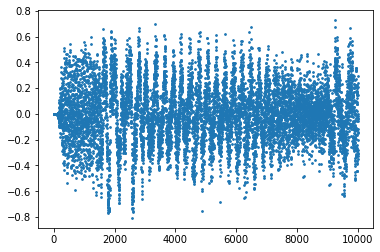

In [ ]:
# grab one audio file
audio_one = audio[0]
plt.scatter([x for x in range(0,len(audio_one))],audio_one, 3)

As we can see from this plot, it represents typical oscillograms for audio data.

Here we experiment on how to populate unique audio features into a new dataframe:

In [ ]:
df_test = pd.DataFrame()
data = {}
data['test'] = 1
data['testOne'] = 2
data['testTwo'] = 3
data['testThree'] = 4
# can only append a dict if ignore_index=True
df_test = df_test.append(data, ignore_index = True)
data = {}
data['test'] = 4
data['testOne'] = 5
data['testTwo'] = 6
data['testThree'] = 7
# can only append a dict if ignore_index=True
df_test = df_test.append(data, ignore_index = True)
print(df_test)

   test  testOne  testTwo  testThree
0   1.0      2.0      3.0        4.0
1   4.0      5.0      6.0        7.0


## Feature Extraction
Perform feature extraction from audio data and create a new data frame to store these features.

It is important to note that this dataframe is then converted to a CSV for easy
access in later runtimes.

We do not run this cell again after running it once, it is here for the sole purpose of extracting features once.

In [ ]:
audio_dataset = audio
genre_dataset = genres_factorized

df = pd.DataFrame()

for i, genre in enumerate(genre_dataset):
  current_audio = audio_dataset[i]
  current_genre = genre_dataset[i]
  # note: we can index into this because they should be the same length.

  # extract a range of features using the audio data, and append the genre at the end.
  zero_crossing_rate = librosa.feature.zero_crossing_rate(current_audio)
  spectral_bandwidth = librosa.feature.spectral_bandwidth(current_audio)
  spectral_rolloff = librosa.feature.spectral_rolloff(current_audio)
  chroma_stft = librosa.feature.chroma_stft(current_audio)
  chroma_cqt = librosa.feature.chroma_cqt(current_audio)
  spectral_centroid = librosa.feature.spectral_centroid(current_audio)
  root_mean_square = librosa.feature.rms(current_audio)
  spectral_contrast = librosa.feature.spectral_contrast(current_audio)
  spectral_flatness = librosa.feature.spectral_flatness(current_audio)
  # will be multidimensional, need to iterate over
  mfcc_raw = librosa.feature.mfcc(current_audio)
  mfcc_data = [[] for _ in range(20)]
  data_for_frame = {}

  for j, val in enumerate(mfcc_raw):
    mfcc_data[j].append(np.mean(val))
  
  for i, val in enumerate(mfcc_data):
    format_mfcc = str(i) + "_" + "mfcc"
    data_for_frame[format_mfcc] = val
  
  # using 1 rhythm feature
  # fixed 512 inspired by https://arxiv.org/pdf/2001.09989.pdf
  hop_length = 512
  oenv = librosa.onset.onset_strength(current_audio, hop_length=hop_length)
  tempogram = librosa.feature.tempogram(onset_envelope=oenv, hop_length=hop_length)

  # place remaining things in data frame
  data_for_frame['zero_crossing_rate_mean'] = np.mean(zero_crossing_rate)
  data_for_frame['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
  data_for_frame['spectral_rolloff_mean'] = np.mean(spectral_rolloff)
  data_for_frame['chroma_stft_mean'] = np.mean(chroma_stft)
  data_for_frame['chroma_cqt_mean'] = np.mean(chroma_cqt)
  data_for_frame['spectral_centroid_mean'] = np.mean(spectral_centroid)
  data_for_frame['root_mean_square_mean'] = np.mean(root_mean_square)
  data_for_frame['spectral_contrast_mean'] = np.mean(spectral_contrast)
  data_for_frame['spectral_flatness_mean'] = np.mean(spectral_flatness)
  data_for_frame['genre'] = current_genre
  # check data 
  # print(data_for_frame)
  df = df.append(data_for_frame, ignore_index = True)

Visualize the dataframe and check shape.

In [ ]:
print(df.shape)
df.head()

(50, 30)


,0_mfcc,1_mfcc,2_mfcc,3_mfcc,4_mfcc,5_mfcc,6_mfcc,7_mfcc,8_mfcc,9_mfcc,...,zero_crossing_rate_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,chroma_cqt_mean,spectral_centroid_mean,root_mean_square_mean,spectral_contrast_mean,spectral_flatness_mean,genre
0,[-219.49777],[130.7808],[-56.500313],[-1.6627439],[-39.58187],[-44.46691],[-27.972912],[10.804591],[-30.900665],[-10.43949],...,0.082397,1441.119629,2635.125732,0.240237,0.307502,1475.401573,0.080519,27.074379,0.000647,0.0
1,[-60.66811],[100.64209],[9.736521],[34.196373],[-6.0321226],[6.906572],[-13.390559],[14.776555],[-5.3575606],[2.9433587],...,0.077686,2366.236433,4467.062988,0.452587,0.331815,2104.600662,0.263258,22.051558,0.014267,1.0
2,[-246.47588],[42.460117],[5.0099764],[26.174292],[30.12532],[23.882298],[-9.20281],[3.4531484],[-0.13031569],[17.549213],...,0.103198,2595.603225,5397.297363,0.545373,0.275895,2899.117658,0.081953,25.490985,0.016494,1.0
3,[-101.4783],[91.83645],[-45.401703],[109.75922],[-15.5585575],[14.34713],[-53.244434],[-5.218281],[-4.3908243],[-14.585335],...,0.162158,1970.158169,4903.110352,0.207100,0.453229,2576.699664,0.178909,26.966522,0.002138,2.0
4,[-96.90276],[83.718185],[-4.1414948],[51.402637],[12.077312],[8.095867],[-6.1627603],[10.623767],[2.2292342],[18.480537],...,0.051953,2411.208136,4672.166748,0.456623,0.422752,2102.014151,0.237191,22.567514,0.011106,1.0


Above is the data processed into features. The label is on the last column, which is genre.

As you can see, there is brackets from the way that we created the features, so we need to fix this by doing some more cleaning below.

## Clean Up

Due to the way that we added the mfcc to the dataframe, each one is represented as a string with brackets. Using the same traversal method, we fix this dataframe below.

After fixing, the new CSV is saved to the drive, cleaned version will exist in the zip.

In [ ]:
# iterate over all mfcc's
for i in range(20): 
    # obtain key value.
    str_mfcc = str(i) + "_" + "mfcc"

    # remove the brackets.
    dataset[str_mfcc] = dataset[str_mfcc].str.replace('[', '')
    dataset[str_mfcc] = dataset[str_mfcc].str.replace(']', '')

    # convert the value to a float
    dataset[str_mfcc] = dataset[str_mfcc].astype(float)

## Convert Dataframe to CSV

This is neccesary for faster loading of features and their corresponding labels during every runtime of the notebook. This can only be loaded in after feature extraction and loading of raw data or corresponding pickle file. 

In [ ]:
df.to_csv('features_and_genres.csv', index = False)

Load in the dataset after saved in drive, and look at the head to confirm load.

In [14]:
dataset = pd.read_csv("/content/drive/MyDrive/MusicGenreClassifier/data/features_and_genres.csv")
print(dataset.shape)
dataset.head()

(3000, 30)


,0_mfcc,1_mfcc,2_mfcc,3_mfcc,4_mfcc,5_mfcc,6_mfcc,7_mfcc,8_mfcc,9_mfcc,...,zero_crossing_rate_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,chroma_cqt_mean,spectral_centroid_mean,root_mean_square_mean,spectral_contrast_mean,spectral_flatness_mean,genre
0,-239.182080,105.002630,-5.420368,8.195547,-13.585337,-11.952293,-34.566986,-22.826794,-34.079240,-23.052376,...,0.092304,1954.159234,3527.789676,0.413558,0.540839,1769.207501,0.071439,23.035113,0.016399,0.0
1,-61.600370,82.566750,-14.789812,-0.885404,-21.111500,8.423066,-10.395347,1.299746,-17.007654,0.486616,...,0.106761,2424.659290,5149.239871,0.296867,0.431643,2459.861178,0.246482,23.297030,0.016841,1.0
2,-98.709305,33.272823,-56.833916,-10.869877,-13.525254,15.804026,-17.110487,2.136169,-9.958399,12.864570,...,0.187456,2352.717160,5677.905046,0.229957,0.510258,2976.347710,0.196541,25.332131,0.011237,1.0
3,-430.478970,-76.468575,-89.444170,30.185099,39.092514,0.245330,-44.325783,49.806340,5.865101,-6.805406,...,0.242436,2060.996362,6118.684707,0.180155,0.241496,3632.127821,0.028401,22.959285,0.003571,0.0
4,-148.560560,42.659720,-23.117065,41.943570,-7.262955,20.053590,-16.171430,5.610440,-23.446230,-1.038424,...,0.138204,2377.397428,5634.813601,0.216900,0.397297,2769.230823,0.110855,29.140654,0.004242,0.0


Display the new data frame that will be used for our traditional models.

In [15]:
dataset.to_csv('features_and_genres.csv', index = False)
dataset.head()

,0_mfcc,1_mfcc,2_mfcc,3_mfcc,4_mfcc,5_mfcc,6_mfcc,7_mfcc,8_mfcc,9_mfcc,...,zero_crossing_rate_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,chroma_cqt_mean,spectral_centroid_mean,root_mean_square_mean,spectral_contrast_mean,spectral_flatness_mean,genre
0,-239.182080,105.002630,-5.420368,8.195547,-13.585337,-11.952293,-34.566986,-22.826794,-34.079240,-23.052376,...,0.092304,1954.159234,3527.789676,0.413558,0.540839,1769.207501,0.071439,23.035113,0.016399,0.0
1,-61.600370,82.566750,-14.789812,-0.885404,-21.111500,8.423066,-10.395347,1.299746,-17.007654,0.486616,...,0.106761,2424.659290,5149.239871,0.296867,0.431643,2459.861178,0.246482,23.297030,0.016841,1.0
2,-98.709305,33.272823,-56.833916,-10.869877,-13.525254,15.804026,-17.110487,2.136169,-9.958399,12.864570,...,0.187456,2352.717160,5677.905046,0.229957,0.510258,2976.347710,0.196541,25.332131,0.011237,1.0
3,-430.478970,-76.468575,-89.444170,30.185099,39.092514,0.245330,-44.325783,49.806340,5.865101,-6.805406,...,0.242436,2060.996362,6118.684707,0.180155,0.241496,3632.127821,0.028401,22.959285,0.003571,0.0
4,-148.560560,42.659720,-23.117065,41.943570,-7.262955,20.053590,-16.171430,5.610440,-23.446230,-1.038424,...,0.138204,2377.397428,5634.813601,0.216900,0.397297,2769.230823,0.110855,29.140654,0.004242,0.0


# Data Visualization

## Part 1

This first part is the visualization of the raw audio data that we first obtained.

In [16]:
# We call torchaudio Spectrogram function, testing out various parameters, available at https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html
def get_spectrogram(waveform, n_fft = 400, win_len = None, hop_len = None,power = 2.0):  
    spectrogram = T.Spectrogram(
      n_fft=n_fft,
      win_length=win_len,
      hop_length=hop_len,
      center=True,
      pad_mode="reflect",
      power=power)
    return spectrogram(waveform)

# We call torchaudio MelSpectrogram function, testing out various parameters, available athttps://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html#sphx-glr-tutorials-audio-feature-extractions-tutorial-py
def get_mel_spectrogram(waveform, sample_rate, n_fft = 400, win_len = None, hop_len = 512, n_mels=128):
    mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_len,
    hop_length=hop_len,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk")
    return mel_spectrogram(waveform)

# We modify an existing spectrogram plotting available at https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html#sphx-glr-tutorials-audio-feature-extractions-tutorial-py
def plot_spectrogram(spectrogram, title = "Spectrogram Plot for Waveform", xlabel = "Frequency Bins", ylabel = "Frame"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    im = axs.imshow(librosa.power_to_db(spectrogram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

We pick a random audio file to test out our get_spectrogram and get_mel_spectrogram functions.

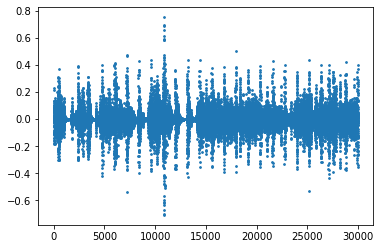

In [ ]:
random_audio_sample_path = audio_folder_path + "/006/006443.mp3"
random_audio, sr = librosa.load(random_audio_sample_path, sr=1000)
plt.scatter([x for x in range(0,len(random_audio))],random_audio, 3)

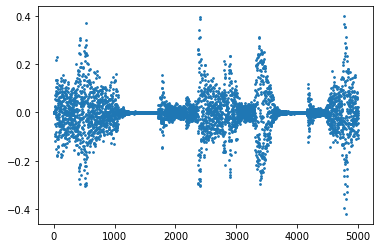

In [ ]:
tmp = truncate_sample(random_audio, 5000)
plt.scatter([x for x in range(0,len(tmp))],tmp, 3)

The following spectrogram gives a visual representation of an audio file. After applying a FFT (Fast Fourier Transform), we can plot the resulting frequencies and amplitudes while preserving the time domain. We can see that the darker the color, the higher the amplitude; the frequencies are represented across the x-axis and the time-domain is represented across the y-axis.

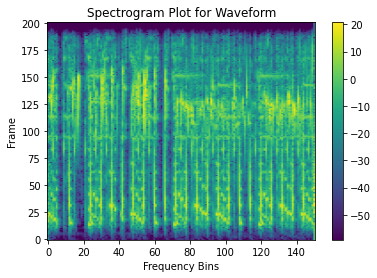

In [ ]:
spectrogram = get_spectrogram(torch.FloatTensor(random_audio))
plot_spectrogram(spectrogram)

The following mel spectrogram provides a visual for an audio sample. A mel spectrogram differs from a normal spectrogram by giving more importance to some frequencies; this unique feature is better suited for human perception applications (like identifying genres of music) since some frequencies of audio are recognized and 'felt' more than others.

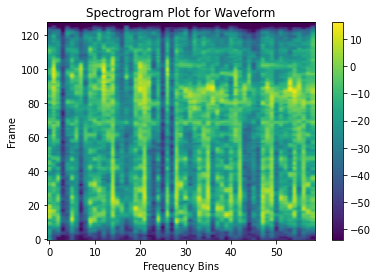

In [ ]:
mel_spectrogram = get_mel_spectrogram(torch.FloatTensor(random_audio), sr)
plot_spectrogram(mel_spectrogram)

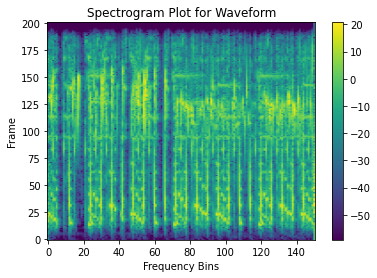

In [ ]:
random_audio_resampled, sr = librosa.load(random_audio_sample_path, sr=8_000)
spectrogram_resampled= get_spectrogram(torch.FloatTensor(random_audio))
plot_spectrogram(spectrogram_resampled)

## Part 2

In this part we visualized the features that we extracted from the raw data, to
find interesting characteristicts that could help us later and check for any problems.

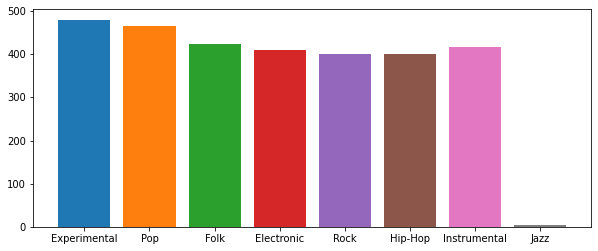

In [ ]:
Genres = ['Experimental', 'Pop', 'Folk', 'Electronic',
        'Rock', 'Hip-Hop', 'Instrumental', 'Jazz']

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
for i in range(len(Genres)):
    tmp = dataset[dataset['genre'] == i]
    plt.bar(Genres[i], len(tmp.values))
plt.show()

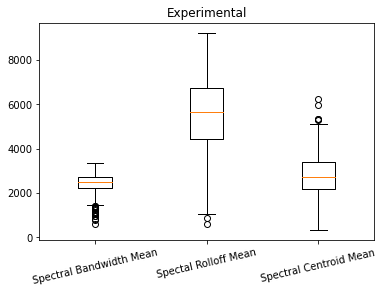

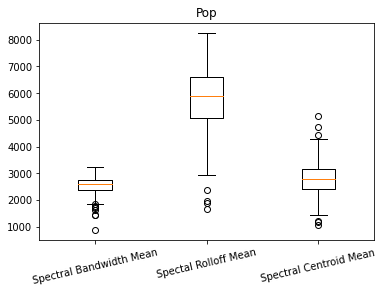

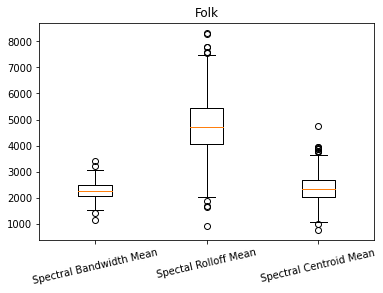

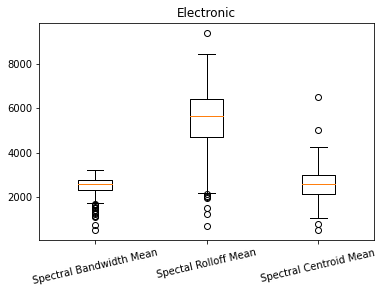

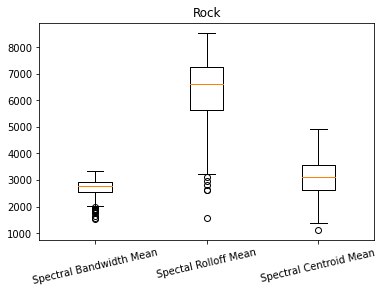

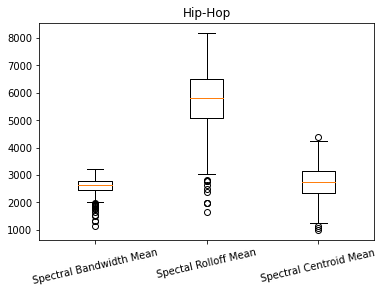

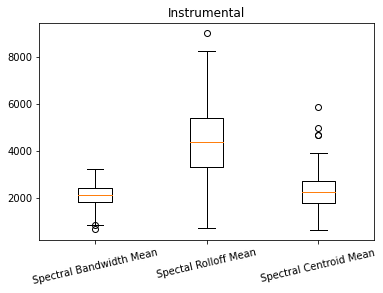

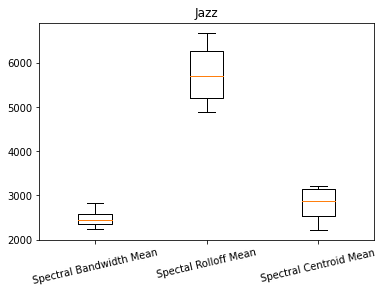

In [ ]:
for i in range(len(Genres)):
    tmp = dataset[dataset['genre'] == i] 
    tmp = tmp.filter(items=['spectral_bandwidth_mean', 'spectral_rolloff_mean','spectral_centroid_mean'])
    fig, ax = plt.subplots()
    ax.boxplot(tmp.to_numpy())
    fig.set_size_inches(6, 4)
    plt.title(Genres[i])
    plt.xticks([1, 2, 3], ["Spectral Bandwidth Mean", "Spectal Rolloff Mean", "Spectral Centroid Mean"], rotation=13)
    plt.show()

# Traditional Machine Learning Approaches

## Jazz Data Removal and Shape Checking

After data analysis and visualization, we found that we should drop "JAZZ" data as the dataset only contains a few of these points. As you can see, removing it did not dramatically decrease the amount of rows. This will ensure that accuracy clearly represents the performance of the model.

In [17]:
# Drop all "Jazz" data as the dataset only contains a few of these points
dataset = dataset[dataset['genre'] != 7]

X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]
Y_flat = Y.iloc[:,0]
Y_flat.ravel()
print('Shape of Features: ', X.shape)
print('Shape of Labels: ', Y.shape)
print('Shape of Labels Flat:', Y_flat.shape)
# print('Features Data: ', X)
# print('Labels Data: ', Y)
print(type(X))
print(type(Y))
print(type(Y_flat))

Shape of Features:  (2996, 29)
Shape of Labels:  (2996, 1)
Shape of Labels Flat: (2996,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Visualize features and their corresponding labels

In [18]:
X.head()

,0_mfcc,1_mfcc,2_mfcc,3_mfcc,4_mfcc,5_mfcc,6_mfcc,7_mfcc,8_mfcc,9_mfcc,...,19_mfcc,zero_crossing_rate_mean,spectral_bandwidth_mean,spectral_rolloff_mean,chroma_stft_mean,chroma_cqt_mean,spectral_centroid_mean,root_mean_square_mean,spectral_contrast_mean,spectral_flatness_mean
0,-239.182080,105.002630,-5.420368,8.195547,-13.585337,-11.952293,-34.566986,-22.826794,-34.079240,-23.052376,...,-9.339978,0.092304,1954.159234,3527.789676,0.413558,0.540839,1769.207501,0.071439,23.035113,0.016399
1,-61.600370,82.566750,-14.789812,-0.885404,-21.111500,8.423066,-10.395347,1.299746,-17.007654,0.486616,...,-0.461147,0.106761,2424.659290,5149.239871,0.296867,0.431643,2459.861178,0.246482,23.297030,0.016841
2,-98.709305,33.272823,-56.833916,-10.869877,-13.525254,15.804026,-17.110487,2.136169,-9.958399,12.864570,...,6.575595,0.187456,2352.717160,5677.905046,0.229957,0.510258,2976.347710,0.196541,25.332131,0.011237
3,-430.478970,-76.468575,-89.444170,30.185099,39.092514,0.245330,-44.325783,49.806340,5.865101,-6.805406,...,1.305828,0.242436,2060.996362,6118.684707,0.180155,0.241496,3632.127821,0.028401,22.959285,0.003571
4,-148.560560,42.659720,-23.117065,41.943570,-7.262955,20.053590,-16.171430,5.610440,-23.446230,-1.038424,...,20.801971,0.138204,2377.397428,5634.813601,0.216900,0.397297,2769.230823,0.110855,29.140654,0.004242


In [19]:
Y.head()

,genre
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


Create a new scores array for use in creating results dataframe.

In [20]:
accuracy_scores = []

## Regression

In this section, we seek to find a 1-1 correlation between any particular feature and label (genre). We did not expect this to perform well, due to the nature of the data. We understand that regression is traditionally suited for predicting continuous variables. However, we use linear regression to show how it is not well suited for classifing audio data.

```
mae : 2.1168252336186318e-15 
mse : 2.1168252336186318e-15 
rmse : 2.4312954811079862e-15 
r2 : 1.0 
```
In lin-reg models, when we call on .score(), it is basically giving us the r2 score.

This above is genre-genre mapping, serving as a baseline for what good performance would be, or should trail towards.

In [21]:
# last column will have a perfect correlation, this was intentionally left in.
# look above for more information.
arr = []
for column in dataset:
    # split the data into training and testing sets
    
    x = dataset[column].values.reshape(-1,1)
    y = dataset['genre'].values.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

    # create a linear regression model
    lg = LinearRegression()

    # fit the model to the training data
    lg.fit(x_train, y_train)

    # predict the test data
    y_test_preds = lg.predict(x_test)

    # print the accuracy of the model
    accuracy = lg.score(x_test, y_test)
    mae = metrics.mean_absolute_error(y_test, y_test_preds)
    mse = metrics.mean_squared_error(y_test, y_test_preds)
    rmse = metrics.mean_squared_error(y_test, y_test_preds, squared=False)
    r2 = metrics.r2_score(y_test, y_test_preds)
    arr.append(r2)
    print('Score of Linear Regression: ', 
      lg.score(x_test, y_test))
    print("mae : {} ".format(mae))
    print("mse : {} ".format(mae))
    print("rmse : {} ".format(rmse))
    print("r2 : {} ".format(r2))
    print('-')

arr.pop()
print("Average R2: ", np.mean(arr))
accuracy_scores.append(("Simple Linear Regression", np.mean(arr)))

Score of Linear Regression:  -0.006546392231736808
mae : 1.8005281265817574 
mse : 1.8005281265817574 
rmse : 2.04503669797465 
r2 : -0.006546392231736808 
-
Score of Linear Regression:  0.011961310322076146
mae : 1.7992620801489088 
mse : 1.7992620801489088 
rmse : 2.0261480830986986 
r2 : 0.011961310322076146 
-
Score of Linear Regression:  -0.0024972203234274737
mae : 1.7932774270586105 
mse : 1.7932774270586105 
rmse : 2.040919128239366 
r2 : -0.0024972203234274737 
-
Score of Linear Regression:  -0.005794535594893624
mae : 1.8003833111273655 
mse : 1.8003833111273655 
rmse : 2.044272768133791 
r2 : -0.005794535594893624 
-
Score of Linear Regression:  -0.0059684879281818315
mae : 1.8049222936173412 
mse : 1.8049222936173412 
rmse : 2.0444495391496944 
r2 : -0.0059684879281818315 
-
Score of Linear Regression:  -0.005389768845526666
mae : 1.8027208104786359 
mse : 1.8027208104786359 
rmse : 2.0438613834624264 
r2 : -0.005389768845526666 
-
Score of Linear Regression:  -0.0056355215

We understand that these results are terrible, but that was the purpose of this experiment.

## Multiple Linear Regression

Below, we perform a train-test split on all of the features, shuffle the training data. Again, here, we do not expect much, and were quite surprised at the generally better performance.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# create a linear regression object
regression = LinearRegression().fit(x_train, y_train)

# predict the response for test dataset
y_pred = regression.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)
print('Score of Linear Regression: ', 
      regression.score(x_test, y_test))
print("mae : {} ".format(mae))
print("mse : {} ".format(mae))
print("rmse : {} ".format(rmse))
print("r2 : {} ".format(r2))

# # 5 fold cross validation on regression model)
cvlr = cross_val_score(LinearRegression(), X, Y, cv=5)
# # print each cv score (accuracy) and average them
print("Average 5-Fold CV Score: {}".format(np.mean(cvlr)))

accuracy_scores.append(("Multiple Linear Regression", regression.score(x_test, y_test)))

Score of Linear Regression:  0.04186869917502456
mae : 1.7511961688209488 
mse : 1.7511961688209488 
rmse : 1.9952472532609216 
r2 : 0.04186869917502456 
Average 5-Fold CV Score: -0.01443207778452773


## Logistic Regression

We are not surprised at the results of the linear regression and multiple linear regression. These are designed for regression tasks involving the prediction of continuous variables. But our goal is genre classification. And in the realm of machine learning, logistic regression is helpful in accomplishing classification tasks, especially on a dataset like FMA which is designed for supervised learning. Below, we show the clear improvement between a logistic regression and a linear regression, and the importance of understanding your data.

In [23]:
warnings.filterwarnings('ignore')


# perform the train test split.
x_train, x_test, y_train, y_test = train_test_split(X, Y_flat, test_size=0.2, random_state = 250)

# feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# create a logisitic regression model
logistic_regression = LogisticRegression()

# fit 
logistic_regression.fit(x_train, y_train)

# make prediction
y_pred = logistic_regression.predict(x_test)

# print the accuracy
print('--')
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print('--')
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print('--')

accuracy_scores.append(("Logistic Regression", accuracy_score(y_test, y_pred) * 100))

--
Accuracy: 47.17%
--
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.49      0.39      0.43       103
         1.0       0.35      0.30      0.32        91
         2.0       0.52      0.59      0.55        87
         3.0       0.38      0.28      0.32        87
         4.0       0.51      0.68      0.58        80
         5.0       0.47      0.59      0.52        70
         6.0       0.53      0.56      0.55        82

    accuracy                           0.47       600
   macro avg       0.46      0.48      0.47       600
weighted avg       0.46      0.47      0.46       600

--


## Decision Tree

For the decision tree we decided to use a grid search for different attributes. 
And we realized that while the accuracy was not the best, this gave us assurance that our data extraction made sense. 

In [24]:
start = time.time()
USE_GRID_SEARCH = False

x_train, x_test, y_train, y_test = train_test_split(X, Y_flat, test_size=0.2, random_state=250)

# feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# after experimentation, we found htat max depth of 5 gives the best accuracy score.
decision_tree = tree.DecisionTreeClassifier(max_depth = 5, 
                                            random_state = 250,
                                            max_features = 29,
                                            criterion ="gini")


# we provide a grid search option, mainly for us to understand best depths.
if USE_GRID_SEARCH:
    possible_values = {'max_depth': [5,10,15,20], 'min_samples_leaf': [5,10,15,20]}
    best_tree = GridSearchCV(decision_tree, param_grid=possible_values, cv=5, scoring='accuracy')
    best_tree.fit(x_train, y_train)
    y_pred = best_tree.predict(x_test)
else:
    decision_tree.fit(x_train, y_train)
    y_pred = decision_tree.predict(x_test)

# print the accuracy
print('--')
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print('--')
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print('--')

stop = time.time()
print("The time of the run:", stop - start)

accuracy_scores.append(("Decision Tree", accuracy_score(y_test, y_pred) * 100))

--
Accuracy: 40.33%
--
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.69      0.24      0.36       103
         1.0       0.30      0.46      0.37        91
         2.0       0.44      0.51      0.47        87
         3.0       0.32      0.22      0.26        87
         4.0       0.62      0.40      0.48        80
         5.0       0.40      0.56      0.46        70
         6.0       0.35      0.50      0.41        82

    accuracy                           0.40       600
   macro avg       0.45      0.41      0.40       600
weighted avg       0.45      0.40      0.40       600

--
The time of the run: 0.05315876007080078


## KNN

In [25]:
# Data split
x_train, x_test, y_train, y_test = train_test_split(X, Y_flat, test_size=0.2, random_state=137)
x_train, y_train = skl.utils.shuffle(x_train, y_train, random_state=89)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# train knn model
# typically, we would want 8 neighbors. But because there was 
# barely any Jazz in the dataset and we dropped it, we will use 7.

# auto -> selects the best algorithm based on what we pass to fit method.
knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance', algorithm = 'auto', p = 1)

knn.fit(x_train, y_train)

pred = knn.predict(x_test)

accuracy_score = knn.score(x_test, y_test)

print('--')
print("Accuracy: {:.2f}%".format(accuracy_score * 100))

# classification report
classification_report = metrics.classification_report(y_test, pred)
print(classification_report)

# precision score
precision_score = metrics.precision_score(y_test, pred, average='weighted')
print("Precision score = ""{:.2f}".format(precision_score))

# recall score
recall_score = metrics.recall_score(y_test, pred, average='weighted')
print("Recall score = ""{:.2f}".format(recall_score))
print('--')

accuracy_scores.append(("KNN", accuracy_score * 100))

--
Accuracy: 43.17%
              precision    recall  f1-score   support

         0.0       0.45      0.27      0.33        83
         1.0       0.39      0.40      0.39        96
         2.0       0.47      0.59      0.52        82
         3.0       0.34      0.37      0.36        89
         4.0       0.49      0.55      0.52        87
         5.0       0.45      0.44      0.44        73
         6.0       0.45      0.42      0.43        90

    accuracy                           0.43       600
   macro avg       0.43      0.43      0.43       600
weighted avg       0.43      0.43      0.43       600

Precision score = 0.43
Recall score = 0.43
--


## SVM

There are 4 types of available kernels for Support Vector Machines: Linear, Polynomial, Radial Basis Function, and Sigmoid. According to some articles and papers, the polynomial kernel should have been the most successful since it is widely used for natural language processing. However, we can see how this is not the case for our data.   
https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook  
https://link.springer.com/article/10.1007/s42452-020-03870-0

In [26]:
# Data split
x_train, x_test, y_train, y_test = train_test_split(X, Y_flat, test_size=0.2, random_state=250)
x_train, y_train = skl.utils.shuffle(x_train, y_train, random_state=89)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# -=-=-RBF KERNEL-=-=-
model = svm.SVC()
model.fit(x_train, y_train)

# Make predictions on test set
y_pred = model.predict(x_test)
print("--")

# basic svc
print("Default SVC Model (RBF Kernel)")
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred) * 100))

# after printing all accuracy scores, we found that the default kernel had the best accuracy.
# this is why it is the only SVC we append. 
accuracy_scores.append(("Default SVC (RBF Kernel)", metrics.accuracy_score(y_test, y_pred) * 100))
print("--")

# -=-=-LINEAR KERNEL-=-=-
model = svm.SVC(kernel = "linear")
model.fit(x_train, y_train)

# Make predictions on test set
y_pred = model.predict(x_test)

print("SVC (Linear Kernel)")
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred) * 100))
print("--")

# -=-=-POLYNOMIAL KERNEL-=-=-
model = svm.SVC(kernel='poly', degree=3, C = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("SVC (Polynomial Kernel)")
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred) * 100))
print("--")

# -=-=-SIGMOID KERNEL-=-=-
model = svm.SVC(kernel = "sigmoid")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("SVC (Sigmoid Kernel)")
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred) * 100))
print("--")


model = svm.SVC()
model.fit(x_train, y_train)
scores = cross_val_score(model, X, Y_flat, cv=5)
avg_scr = sum(scores) / len(scores)
print("Accuracies from cross_val_score: {}".format(scores))
print("Average score: {}".format(avg_scr))


--
Default SVC Model (RBF Kernel)
Accuracy: 50.83%
--
SVC (Linear Kernel)
Accuracy: 48.50%
--
SVC (Polynomial Kernel)
Accuracy: 42.17%
--
SVC (Sigmoid Kernel)
Accuracy: 30.17%
--
Accuracies from cross_val_score: [0.25666667 0.22871452 0.24707846 0.28046745 0.29883139]
Average score: 0.26235169727323315


## Random Forest

In [27]:
# Data split
x_train, x_test, y_train, y_test = train_test_split(X, Y_flat, test_size=0.2, random_state=250)
x_train, y_train = skl.utils.shuffle(x_train, y_train, random_state=89)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Creating a grid of parameters
n_estimators = np.linspace(500, 1000, int((1000-500)/200) + 1, dtype=int)
print(n_estimators)
max_features = ['auto', 'sqrt']
max_depth = [10, 15, 16, 17, 18, 19, 20, 50, 75, 100, 150]
min_samples_split = [5, 10, 15, 20]
min_samples_leaf = [2, 3, 4]
bootstrap = [True, False]
criterion=['gini', 'entropy']


grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

model = RandomForestClassifier()
model = RandomizedSearchCV(estimator = model,
                               param_distributions = grid,
                               n_iter = 5, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
# Train 
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score = model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_score * 100))
accuracy_scores.append(("Random Forest", accuracy_score * 100))

[ 500  750 1000]
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 49.83%



## MLP

This is known as the multi-layer perceptron, and is the classical version of a neural network. It is important to note that this is not a DNN (deep neural network).

In [28]:
# Data split
x_train, x_test, y_train, y_test = train_test_split(X, Y_flat, test_size=0.2, random_state=250)
x_train, y_train = skl.utils.shuffle(x_train, y_train, random_state=89)

# Feature Scaling
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
inverse = sc.inverse_transform(x_train)
x_test = sc.transform(x_test)


# we want to avoid too many neurons in the hidden layer
# so we are not overfitting to the training data.
mlp = MLPClassifier(learning_rate = 'adaptive',
                    learning_rate_init = .001, 
                    activation = 'relu',
                    # tested on different iterations, it seems that we 
                    # reach convergence around 400 iterations.
                    max_iter = 400, 
                    verbose = False)
# will ensure we have 7 output labels.
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)
accuracy_score = mlp.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy_score * 100))
accuracy_scores.append(("Multi-Layer Perceptron", accuracy_score * 100))

Accuracy: 48.00%


## Clustering

In [29]:
def scatter(data, labels, numPoints = 300):
 
   numEntries = data.shape[0]
   start = random.randint(0, numEntries - numPoints)
   end = start + numPoints
   data = data.iloc[start:end, :]
   labels = labels.iloc[start:end]
  
   mds = MDS(n_components=2)
   mds_data = mds.fit_transform(data)
   plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
   plt.show()

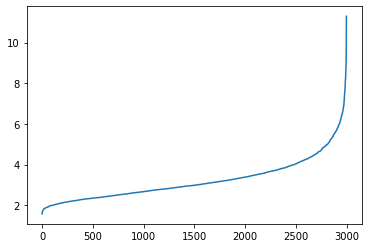

In [ ]:
scaler = StandardScaler()
trans = pd.DataFrame(scaler.fit_transform(X))
pca  = PCA(n_components=0.95, svd_solver='full')
res = pd.DataFrame(pca.fit_transform(trans))
fitted = NearestNeighbors(n_neighbors=4).fit(res)
dist, indices = fitted.kneighbors(res)
four_nearest = [neighbors[-1] for neighbors in dist]
four_nearest.sort()
plt.plot(four_nearest)
plt.show()

The plot above shows each point's distance from its fourth nearest neighbor. We can see that at a certain point (~4 units), the distance skyrockets. Usually, this would be very easy to interpret, as any points farther than that threshold distance would indicate noise; however, this  is a multi-class classification problem, so the distances past that threshold would just mean they belong to a different class. As a result, using these parameters in DBSCAN are most likely not going to make much sense.

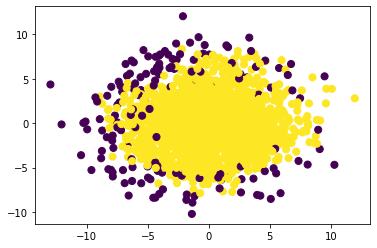

In [ ]:
pred_labels = DBSCAN(eps=4, min_samples=4).fit_predict(res)
pred_labels = pd.Series(pred_labels)
scatter(res, pred_labels, len(pred_labels) // 2)

We can see in the plot above that DBSCAN doesn't do very well in classifying points in different genres. First, the there aren't 7 clusters representing the 7 genres, indicating that the PCA reduction wasn't very useful. As a result, DBSCAN will not be able to classify audio samples into their respective clusters.

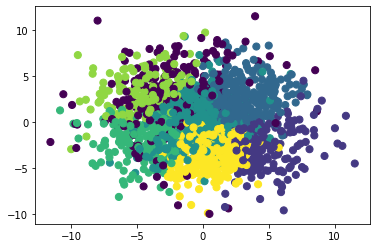

0.07335771749030966


In [ ]:
pred_labels = pd.Series(KMeans(n_clusters=7).fit_predict(res))
score = silhouette_score(res, pred_labels)
scatter(res, pred_labels, len(pred_labels) // 2)
print(score)

We also tried KMeans Clustering to try and overcome the difficulties DBSCAN had; the plot above shows the 7 different clusters very close to another, indicating that the audio samples across genres don't differ on the 2 most important principal components (most likely, the differences acorss genres are much more complex than just a linear combination of features). The silhouette score confirms this analysis with a value of 0.089, very close to 0, indicating that the clusters have little to no meaning.

# Modern Machine Learning Approaches

The modern machine learning approaches below consist of neural networks with either convolution or attention (with exception to the first FF class). The convolution models are listed below. The Convolutionary Neural Network takes in the same feature data as for the traditional machine learning approaches, whereas the transformer directly takes in the audio data processed to 220,000 features. 
Due to a lack of computation and memory on google colab, we evaluate convolution and transformer methods on our local machine with GPU access and plan to insert their performance to the graphs/charts manually in the future. 

## Feed Forward Neural Network

The model below is a traditional feed-forward neural network without any use of attention or convolution. It consists of linear layers, a non-linearity, and a dropout layer.

In [30]:
# Here is a simple FFNN using only linear layers and non-linearities. 
class FF(torch.nn.Module):
    def __init__(self, n_input, genre_output = 8):
        super(FF, self).__init__()
        self.lin_one = nn.Linear(n_input, 1024)
        self.lin_two = nn.Linear(1024, 256)
        # genre output should be 8, using small dataset.
        self.lin_three = nn.Linear(256, genre_output)
        # we have dropout to prevent overfitting, the .2 is a low prob of dropping node.
        self.drop_one = nn.Dropout(0.2)
        # we use ReLu as our activation
        self.non_linear_one = torch.nn.ReLU()

    # this is the forward pass, we depend on the non-linear activation function
    def forward(self, x):
        x = self.lin_one(x)
        x = self.non_linear_one(x)
        x = self.drop_one(x)
        x = self.lin_two(x)
        x = self.non_linear_one(x)
        x = self.drop_one(x)
        x = self.lin_three(x)
        return x

## CNN 

The model below is a variant of a frequently used CNN audio classification model. Like the previous FF class below, the model uses linear layers, non-linearities, and a dropout layer. Additionally, however, the model uses concolution, max pooling, and batch normalization. We will not dive too deeply into the benefits of using convolution, but some of the benefits include weight sharing, the ability to preserve spatial locality, and the inherent efficiency of the convolution itself. Special thanks to Alex for providing insights and core implementations into CNNs and Transformers used in code.

In [ ]:
# Note: This is a model directly from the https://pytorch.org/tutorials/intermediate/speech_command_classification_with_torchaudio_tutorial.html
# This model reflects the model described in the following paper: https://arxiv.org/pdf/1610.00087.pdf

class M5(nn.Module):
    def __init__(self, n_input, n_output, stride=16, n_channel=32):
        super().__init__()
        self.conv1 = nn.Conv1d(n_input, n_channel, kernel_size=80, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_channel)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(n_channel, n_channel, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(n_channel)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(n_channel, 2 * n_channel, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(2 * n_channel)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(2 * n_channel, 2 * n_channel, kernel_size=3)
        self.bn4 = nn.BatchNorm1d(2 * n_channel)
        self.pool4 = nn.MaxPool1d(4)
        self.fc1 = nn.Linear(2 * n_channel, n_output)

    def forward(self, x):
        # make data [batch_size, input_channels, signal_length]
        # x = torch.unsqueeze(x, dim=-2)
        # x = x.permute(0,2,1)
        # batch len, by channel length, by tensor for each channel
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = F.avg_pool1d(x, x.shape[-1])
        x = x.permute(0, 2, 1)
        x = self.fc1(x)
        return F.log_softmax(x, dim=2)

The method below uses the same tools as the M5 method, however there exists slight differenced in the order of each mathematical tool. The Sequential method allows one to combine different sequences of mathematical operations into one larger layer.

In [ ]:
# Heavy modification of existing CNN that Alex wrote a year ago: https://github.com/achandlr/Musical-Instruments/blob/master/2022%20Implementation%20(Improved%20Implementation%20With%20Different%20Focus)/Using%20Transfer%20Learning%20for%20Musical%20Instrument%20Classification.ipynb
class CNN_Custom1(nn.Module):
    def __init__(self, n_input=1, n_output=8, stride=16, n_channel=32):
        super().__init__()
        
        self.layer_1 = nn.Sequential(
            nn.Conv1d(in_channels = n_input, out_channels = n_channel, kernel_size = 80, stride = stride),
            torch.nn.BatchNorm1d(num_features = n_channel),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=4)
        )

        self.layer_2 = nn.Sequential(
            nn.Conv1d(in_channels = n_channel, out_channels = n_channel, kernel_size = 3, stride = 1),
            torch.nn.BatchNorm1d(num_features = n_channel),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=4)
        )

        self.layer_3= nn.Sequential(
            nn.Conv1d(in_channels = n_channel, out_channels = n_channel*2, kernel_size = 3, stride = 1),
            torch.nn.BatchNorm1d(num_features = n_channel*2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=4)
        )
        output_size = 1 
        self.layer_4= nn.Sequential(
            nn.Conv1d(in_channels = n_channel*2, out_channels = n_channel*2, kernel_size = 3, stride = 1),
            torch.nn.BatchNorm1d(num_features = n_channel*2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=4, stride=4),
            nn.AdaptiveAvgPool1d(output_size)
        )

        self.lin_1 = nn.Sequential(
            nn.Flatten(start_dim=1, end_dim = -1),
            nn.Linear(in_features=2*n_channel, out_features=n_output) 
        )

    def forward(self, x, batch_size=1):
        if batch_size == 1:
            x = torch.unsqueeze(x, dim=0)
        # Convolution Steps
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        x = self.layer_4(x) 

        # Flatten and pass through linear layer
        x = self.lin_1(x)
        return x

The following is a method that converts one dataset into three dataloader classes. The dataloader classes are convenient when handling batched data.

In [ ]:
# Builds PyTorch data loader class that includes sampling and batching
def get_data_loaders(dataset, batch_size):
    # 60% - train set, 20% - validation set, 20% - test set
    # shuffle data indicies
    dataset_indices = np.arange(len(dataset))
    np.random.shuffle(dataset_indices)
    train_indices, validate_indices, test_indices = np.split(dataset_indices, [int(.6*len(dataset)), int(.8*len(dataset))])
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,  sampler=train_indices)
    val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,  sampler=validate_indices)
    test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_indices)
    return train_loader, val_loader, test_loader

Our testing method loops through each batch in the data and outputs the predicted genres. We report and overall accuracy score at the end of the method. This method also supports the ability to measure top-k accuracy, or the likely hood that one of the k most likely predicted genres matches the labled genre.

In [ ]:
# heavily modified from existing implementation of a computer vision training loop Alex built: https://github.com/achandlr/Musical-Instruments/blob/master/2022%20Implementation%20(Improved%20Implementation%20With%20Different%20Focus)/Using%20Transfer%20Learning%20for%20Musical%20Instrument%20Classification.ipynb  
def test_network(model, test_loader, description, debug= False, device = "cpu", topk=1):
    correct = 0
    total = 0
    true, pred = [], []
    # set the model to eval mode
    model.eval()
    with torch.no_grad():
        # loop through the batched data
        for inputs, labels  in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model.forward(inputs)
            outputs = torch.squeeze(outputs)
            # calculate the number of correctly predicted outputs
            if topk == 1:
                # unbatched case
                if len(outputs.size()) ==1:
                    predicted = torch.argmax(outputs.cpu())
                else:
                    predicted = torch.argmax(outputs.cpu(), dim=1)
                correct += (predicted == labels.cpu()).sum().item()
            else:
                # allows for one to calculate top-k accuracy
                predicted =torch.topk(outputs, topk).indices
                for idx, label in enumerate(labels):
                    if label in predicted[idx]:
                        correct +=1
                # top_k_predictions = torch.topk(outputs.cpu(), topk)
            total += labels.size(0)
            true.append(labels)
            pred.append(predicted)   
    acc = (100 * correct / total)
    print('%s has a test accuracy of : %0.3f' % (description, acc))
    return acc

The code below allows a the CNN to be trained. This code requires an understanding of PyTorch.

In [ ]:
# heavily modified from existing implementation of a computer vision training loop Alex built: https://github.com/achandlr/Musical-Instruments/blob/master/2022%20Implementation%20(Improved%20Implementation%20With%20Different%20Focus)/Using%20Transfer%20Learning%20for%20Musical%20Instrument%20Classification.ipynb  
def train_network_with_validation(model, train_loader, val_loader, test_loader, criterion, optimizer, description, num_epochs=20, device = "cpu", scheduler = None,  batch_size = 1):
    queue_capacity=1000
    loss_queue = deque(maxlen=queue_capacity)
    queue_loss_list = []
    train_loss_list = []
    val_loss_list = []
    try:
      # use tqdm to report progress
        for epoch in tqdm(range(num_epochs)):
            # problem_cnt = 0
            model.train()
            print('EPOCH %d'%epoch)
            total_loss = 0
            count = 0
            # loop through the batched training data
            for inputs, labels in train_loader:
                inputs = inputs.to(device)
                # assert inputs.requires_grad==True 
                # print(inputs.shape)
                labels = labels.to(device)
                optimizer.zero_grad()
                # print(inputs.shape)
                # pass the inputs into the model to predict the genres
                outputs = model.forward(inputs)
                if batch_size>1:
                    outputs = torch.squeeze(outputs)
                # calculate the loss
                loss = criterion(outputs, labels) 
                # print("loss {}".format(loss))
                loss_queue.append(loss.item())
                # backpropogate the model so that it can learn
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                count += 1
            # print("problem_cnt: {}".format(problem_cnt))
            train_loss = total_loss/count
            train_loss_list.append(train_loss)
            print('{:>12s} {:>7.5f}'.format('Train loss:', train_loss))
            # perform validation for the model after each training epoch
            with torch.no_grad():
                total_loss = 0
                count = 0
                for inputs, labels in val_loader:
                  inputs = inputs.to(device)
                  labels = labels.to(device)
                  outputs = model.forward(inputs)
                  if batch_size>1:
                    outputs = torch.squeeze(outputs)
                  loss = criterion(outputs, labels)
                  total_loss += loss.item()
                  count += 1
                val_loss = total_loss/count
                print('{:>12s} {:>7.5f}'.format('Val loss:', val_loss))
                val_loss_list.append(val_loss)
            if scheduler:
                scheduler.step()
            print()
    except KeyboardInterrupt:
        print('Exiting from training early')
    return queue_loss_list, train_loss_list, val_loss_list

The following code is a allows one to train either the CNN using the training code and models above, or fine-tune a pre-trained transformer model. Notice how the transformer code is remarkably simple. This is because huggingface encapsulates the complexity of the transformer training and model creation by calling on methods available at https://huggingface.co/.

Lets build a new simpler dataset for the processed data. This will enable us to write simple training code.

In [ ]:
audio_features = torch.FloatTensor(dataset.iloc[:,:-1].values)
genres = torch.FloatTensor(dataset.iloc[:,-1].values)

In [ ]:
class ProcessedAudioDataset(Dataset):
    def __init__(self, audio_features, genres):
      self.audio = audio_features
      self.genre = genres
    def __len__(self):
        return len(self.genre)
    def __getitem__(self, idx): 
        return self.audio[idx].unsqueeze(dim=0), self.genre[idx]
processed_audio_dataset = ProcessedAudioDataset(audio_features, genres)

In [ ]:
num_genres = 7 # because took out jazz
topk = 1
scheduler = None
train_loader, val_loader, test_loader = get_data_loaders(processed_audio_dataset, batch_size=batch_size)
# each training model has different training hyperparameters
if model_name == "M5":
  model = M5(n_input=in_channels, n_output=num_genres) 
  lr = 1e-3
  # can also experiment with different parameters
  optimizer = optim.Adam(model.parameters(), lr=lr) # torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
  criterion = nn.CrossEntropyLoss()
  description = "Training M5 CNN model with Adam and CrossEntropyLoss"
  test_description = "Testing M5 CNN model on test data"
elif model_name == "FF":
  model = FF(n_input=in_channels, n_output=num_genres)
  optimizer = optim.Adam(model.parameters(), lr=1e-3)
  criterion = nn.SGD()
  description = "Training FF model with Adam and SGD"
  test_description = "Testing FF model on test data"
elif model_name == "CNN_Custom1":
  model = CNN_Custom1(n_input=in_channels, n_output=num_genres)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) 
  scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1) 
  criterion = nn.CrossEntropyLoss()
  description = "Training CNN_Custom1 model with Adam and CrossEntropyLoss"
  test_description = "Testing CNN_Custom1 CNN model on test data"
else:
  raise NotImplementedError("Model name not implemented")

queue_loss_list, train_loss_list, val_loss_list = train_network_with_validation(model, train_loader, val_loader, test_loader, criterion, optimizer, description, num_epochs=num_epochs, device = "cpu", scheduler = scheduler, batch_size = batch_size)
test_acc = test_network(model, test_loader, description, device = device, topk = topk)


## Transformer

In [ ]:
  # the following line gives us the metric used to evaluate the transformer
  metric = load_metric("accuracy")
  # Note to grader: the following is somewhat out of scope of the project, and relies on modified starter code from from https://huggingface.co/docs/transformers/tasks/audio_classification
  torch_dataset = AudioDataset(meta_data_path = "data/fma_metadata", audio_folder_path = audio_folder_path, preprocessing_dict = preprocessing_dict, debug = debug, datatype = datatype, return_type = dict)
  train_dataset, val_dataset, test_dataset, = random_split(torch_dataset, [.6, .2, .2]) # maybe need .values()
  # build a DatasetDict of the split datasets
  dataset = datasets.DatasetDict({"train":train_dataset,"validation": val_dataset, "test":test_dataset})
  num_labels = len(torch_dataset.genres_factorized[1])
  # create a one to one mapping and inverse mapping of id2label
  id2label,label2id = {}, {}
  for id in range(num_labels):
      id2label[str(id)] = torch_dataset.genres_factorized[1][id]
      label2id[torch_dataset.genres_factorized[1][id]] = str(id)
  # print(id2label)
  # print(label2id)

  # Note to grader: The following code is modified from a colab notebook linked in the official huggingface website (linked below)
  # https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/audio_classification.ipynb#scrollTo=EVWfiBuv2uCS
  def compute_metrics(eval_pred):
      """Computes accuracy on a batch of predictions"""
      predictions = np.argmax(eval_pred.predictions, axis=1)
      return metric.compute(predictions=predictions, references=eval_pred.label_ids)
  # instantiates on a pre trained audio classifcation model
  model = AutoModelForAudioClassification.from_pretrained(
  "facebook/wav2vec2-base", num_labels=num_labels, label2id=label2id, id2label=id2label)
  feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")
  training_args = TrainingArguments(
      output_dir="./results",
      evaluation_strategy="epoch",
      save_strategy="epoch",
      learning_rate=3e-5,
      num_train_epochs=num_epochs,
  )
  # have the model store checkpoints as it trains
  model_checkpoint = "./logs/models/wav2vec2-base"
  model_name = model_checkpoint.split("/")[-1]
  # specify the training arguments
  training_args = TrainingArguments(
  f"{model_name}-finetuned-ks",
  evaluation_strategy = "epoch",
  save_strategy = "epoch",
  learning_rate=3e-5,
  per_device_train_batch_size=batch_size,
  gradient_accumulation_steps=4,
  per_device_eval_batch_size=batch_size,
  num_train_epochs=num_epochs,
  warmup_ratio=0.1,
  logging_steps=10,
  load_best_model_at_end=True,
  metric_for_best_model="accuracy")
  # build the trainer class
  trainer = Trainer(
  model,
  training_args,
  train_dataset=dataset["train"],
  eval_dataset=dataset["validation"],
  tokenizer=feature_extractor,
  compute_metrics=compute_metrics)

  trainer.train()
  trainer.evaluate()

# Result Model Comparison


In [33]:
'''
Example:
[1877, 1980, 2017 ]
["Linear Regression" "Convolutional Neural Network", "Transformer"] 
[32.3, 42, 60]
'''
def plot_accuracy(year_developed, model_names, accuracy ):
    df = pd.DataFrame(list(zip(year_developed, accuracy, model_names)),
                columns =['Year', 'Accuracy', "Model"])
    plt.figure(figsize=(20,5))
    ax = sns.scatterplot(x= 'Year', y='Accuracy', data=df, marker = '*', color= "#965786", s =400)
    ax.set(title="Accuracy of Models ordered by year invented")
    ax.set(xlabel='Year Developed', ylabel='Audio classification accuracy')
    ax.set_xlim (1860, 2020)
    ax.set_ylim (0, 100)
    for i in range(df.shape[0]):
      plt.text(x=df.Year[i]+0.3,y=df.Accuracy[i]+0.3+random.randint(-3,16),s=df.Model[i], fontdict=dict(color='red',size=10))
       # bbox=dict(facecolor=’yellow’,alpha=0.5)
              

In [31]:
accuracy_scores

[('Simple Linear Regression', -0.00112750974111479),
 ('Multiple Linear Regression', 0.04186869917502456),
 ('Logistic Regression', 47.16666666666667),
 ('Decision Tree', 40.33333333333333),
 ('KNN', 43.166666666666664),
 ('Default SVC (RBF Kernel)', 50.83333333333333),
 ('Random Forest', 49.833333333333336),
 ('Multi-Layer Perceptron', 48.0)]

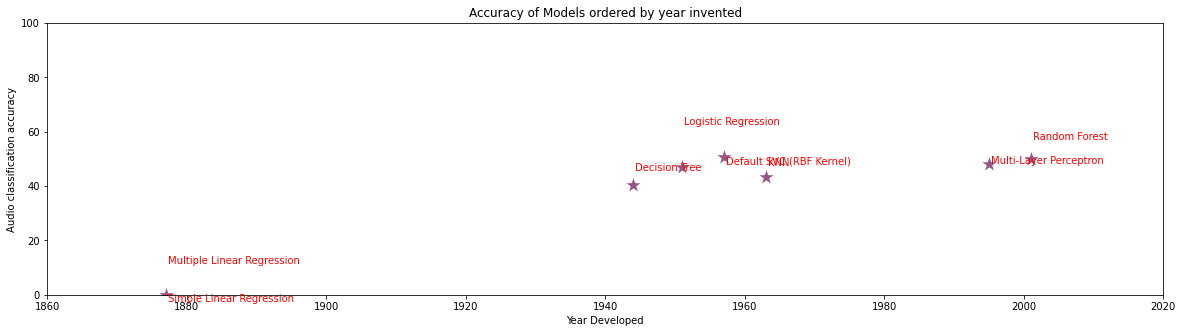

In [37]:
year_developed = [1877, 1877, 1944, 1963, 1951, 1995, 2001, 1957, 1989, 2017]
model_names = [i[0] for i in accuracy_scores]
accuracy = [i[1] for i in accuracy_scores]
plot_accuracy(year_developed, model_names , accuracy)

# Table of Final Results

In [35]:
accuracy_scores = sorted(accuracy_scores, key=lambda x: x[1])
final_scores_dataframe = pd.DataFrame(accuracy_scores, columns = ['Model', 'Accuracy/Score'])
final_scores_dataframe

,Model,Accuracy/Score
0,Simple Linear Regression,-0.001128
1,Multiple Linear Regression,0.041869
2,Decision Tree,40.333333
3,KNN,43.166667
4,Logistic Regression,47.166667
5,Multi-Layer Perceptron,48.000000
6,Random Forest,49.833333
7,Default SVC (RBF Kernel),50.833333


# Discussion / Outcome





## Summary


### Feature Scaling

```
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

```

The above snippet is seen in almost every single classical method, after the train_test_split is performed. Due to a lot of our models using distance based calculations to compute similarities and the features having different metrics, we realized that we had to scale all features in order for the calculations to have any meaning. We found that StandardScaler worked best with all the classical models, and found that the MinMax scaler worked better with the MLP (Simple Neural Network), which is typically good practice in data normalization for normal neural networks and deep neural networks.

### Discussion of Results 

1. Simple Linear Regression: This experiment was done with the sole purpose of showing that this type of regression is traditionally suited for predicting continuous variables. We use linear regression to show how it is not well suited for classifying labeled audio data. The simple linear regression is done by looking for a correspondence between each feature and the label. Even after reshaping, we find the average performance to be extremely poor. The accuracy score that is printed out, is the r2 score. The negative r2 score supports our hypothesis that linear regression was not suited for this dataset. In practice, a negative r2 score means that the model fits worse than a horizontal line.
2. Multiple Linear Regression: We were not very surprised by the performance of the multiple linear regression. We saw clearly that adding more features does not improve the overall performance of a linear regression model on this type of data. 
3. Decision Tree: After performing hyperparameter tuning with GridSearch, we found that decision trees reached an average accuracy of 40% after training. We found that a max depth of 5 gave the best accuracy, but avoided going too high on depth to avoid overfitting and reduce memory consumption. We found that the "entropy" impursity metric performed at a 36% accuracy on average, so we stayed at the default impurity metric, which is Gini. We were quite satisfied with the 40% result, but noticed that they did not do as well as other classification models, likely because they struggle with complex decisions and are very prone to overfitting. Additionally, our data cannot be easily distinguished with binary splitting.
4. KNN: We were surprised at the performance of the KNeighborsClassifier (especially because KNN is known to suffer from the curse of dimensionality). However, this accuracy is still under-par in comparison to other models and usages of KNN, which tend to perform very well. For hyperparameter tuning, it was solely done through trial-and-error experimentation. Typically, we would use 8 neighbors. But because there were barely any Jazz genre's in the dataset, after we dropped it and altered the data-frame, it made sense to set the number of neighbors to 7. Additionally, by default, KNN uses euclidian distance, which is represented as p = 2. We found that for this type of data, manhattan distance worked better, which is represented by p = 1. Finally, we set distance to be used in the weight function for predictions, and we allowed the algorithm selected the compute the neighbors be auto, because the sklearn library automatically selects the best algorithm based on what we pass into the fit method. 
5. Logistic Regression: We knew this model would perform quite well considering it is the better classifier for this kind of supervised learning task. However, this model still relies on some sort of linear combination to extract patterns, and we knew that such a complex dataset was not going to have a simple combination of features. We found that we did not need to mess with the default parameters in sklearn for this model to outperform the ones before it.
6. Random Forest: This ensembling method the singular decision tree because it uses a culmination of decision trees to make a classification. This allows us to address the issue of making complex decisions with simple binary splits in a tree, because now we are using multiple trees (aka a forest) to make a decision. Especially with such complex data, this made a lot of sense that it outperformed. RandomForests are also great on this kind of data because if a particular feature is not well correlated to a genre in the data, the RandomForest performance will not be impacted, as it is quite robust to outliers in the data. For parameters, we found that increasing the number of estimators (aka the number of trees in the forest), played a major role in increasing accuracy. We did not want to make the number of estimators too high, especially because we were only dealing with 3000 records in our data set, and did not want to overfit to the data by adding too many trees. We also found that a deeper tree was more ideal in this case. Generally, we leveraged a grid search to find the best hyper parameters, but there was some trial and error as well. RandomForest performs on par with other classification models that did well, and with multiple trials and hyperparameter tuning, or even more data, we have no doubt that it can reach 60-65% accuracy on this type of data.
7. SVC: We found that the default SVC, which has an RBF kernel, performed the best in comparison to the other kernels. For data with a lot of non-linearities, machine learning engineers tend to create SVM models with the RBF kernel, due to its generalizability and simplicity. It is very widely used because of its similarity to the guassian distribution. This did not surprise us, since it worked best for our dataset as well.
8. Multi-Layer Perceptron (Simple Neural Network): Although an MLP is a very simple neural network with only 3 layers, one advantage that neural networks have is that they are able to seek out very complex patterns. Once we fit to the training data, the neural network immediately has clear output nodes representing every genre. Also, a neural network does not depend on simple dependencies for classification. As a result, it is able to find the more subtle patterns in the data. Due to a minimal number of neurons in the hidden layer, we also can avoid overfitting to the data. We also tuned hyperparameters by enabling verbose initially, and paying attention to loss values and how close we get to convergence on every epoch. We also found training to be extremely fast, and the classification task to be very easy. For a simple neural network, we are very impressed by these results which allows a perfect segway into more complex methods such as CNN and Transformers.
9. Convolutional Neural Network (CNN): Our CNN performs better than all traditional machine learning methods that we experiment with earlier in the notebook. This is due to several reasons. CNN's have outperformed Regrssion, Decision Trees, and the other traditional methods for similar supervised problems such as image classification. CNNs rely on convolution, and can therefore exploit feature locality. There are several other reasons that CNNs outperform the other methods (such as weight sharing), but we will leave this explanation short, as other reasons are outside the scope of this class.
10. Transformer: 
The pre-trained Huggingface audio classification transformer outperforms all other methods by a significant margin. Transfer learning allows a model to utilize data outside of the training set to initialize weights and biases. This helps the model learn on a smaller training dataset. The attention mechanism allows a transformer to put together different pieces of information with keys, queries, and values. Rather than re-explain the benefits of transformers and attention, one can be read in the following powerpoint that Alex previously made to describe the Attention is All you Need paper here: https://docs.google.com/presentation/d/1opo0RbyApa38pmO7a4OrxvBoWp4SnwjWzyPEp3BQm1A/edit?usp=sharing. 

## Limitations

1. **Time Constraints:** We found that the large amount of data pre-processing and general time it took to extract features from the data took an extremely long time, even with the 1000 record pickle file. Due to this, we made the decision to stick to a 3000 record AudioDataset and (3000 x 30) feature-label dataframe. 
2. **Raw Audio:** At the beginning we tried to feed the traditional machine learning models the raw audio data, and focus on tweaking the model attributes and some data processing like resampling and truncation however we quickly realized that it was not working well and did not make sense. So we decided to extract different features from the audio samples to get some meaningful data so the machine learning models could perform better.
3. **Jazz Data:** Through visualization of the data and just general analysis, we noticed that in 3000 records of data, there was an extremely limited amount of Jazz data, which is represented by the factorized label of 7. We ultimately made the decision to remove this label from the data, making the genre classification values from 0 to 6, 0 inclusive. This strayed us away a bit from the general goal of classifying 8 genres. But after removing the Jazz data, the total amount of records in the dataset only reduced by 4, so it was a safe decision. 
4. **Computation and Memory Constraints:** Due to a lack of computation and memory on Google Colab, we evaluate convolution and transformer methods on our local machine with GPU access and plan to insert their performance to the graphs/charts manually in the future.

## Why did we show linear regression results and not perform clustering? 

1. Looking at the final result chart, you can see that we performed 2 methods of linear regression. Part #1 represents looking for a correspondence between
each feature and the label. Even after reshaping, we find the average performance to be extremely poor. Part #2 represents a multiple linear regression, with the average result being better, but still extremely poor. The values on the score-board represent the R2 score. Although there are instances where linear regression can be used for classification, for these types of features, it just does not work, even with reshaping. Clustering algorithms (for the most part), will typically not perform as well as classification algorithms, especially when we have labels. This is because although we might be able to find correspondence between data points, clustering algorithms do not have a set path on what kind of problem they are solving, so genre detection would be quite complex. Especially for supervised learning (since we have labels for our data), using more classical and common classification methods through sklearn libraries was the clear choice. And as you see, the moment we used a logistic regression instead of a linear regression, there was a HUGE jump in improvement.



# Future Work / Potential Improvements


1. More time and computation power to load the raw audio files and preprocess them could increase the accuracy of the traditional models by a lot. We think they will benefit from more training data and also having more time to do bigger grid search for the attributes. 
2. As we dropped all datapoint with the Jazz class label after analyzing the whole dataset, it is possible to analyze the features more in depth and look for more unique distributions or correlations between them. This can help in finding a different scaling/normalizing approach and also finding better model attributes.

# Acknowledgements

Special thanks to the Angie Beasley for teaching us core material neccesary to make this project possible, and to all contributors (Omeed, Kunal, Alex and Felipe). 